# **Taller Agrupamiento**

- Lorenzo Porras Duque
- Samuel Bejarano De La Pava
- David Duque Jimenez

In [5]:
#TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np

#GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px

#PREPARACIÓN DE DATOS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config

#MODELADO
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

#EVALUACIÓN
from sklearn.metrics import silhouette_score

#ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

In [6]:
data= pd.read_csv('datos_caso_2.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Verificar si hay datos faltantes

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

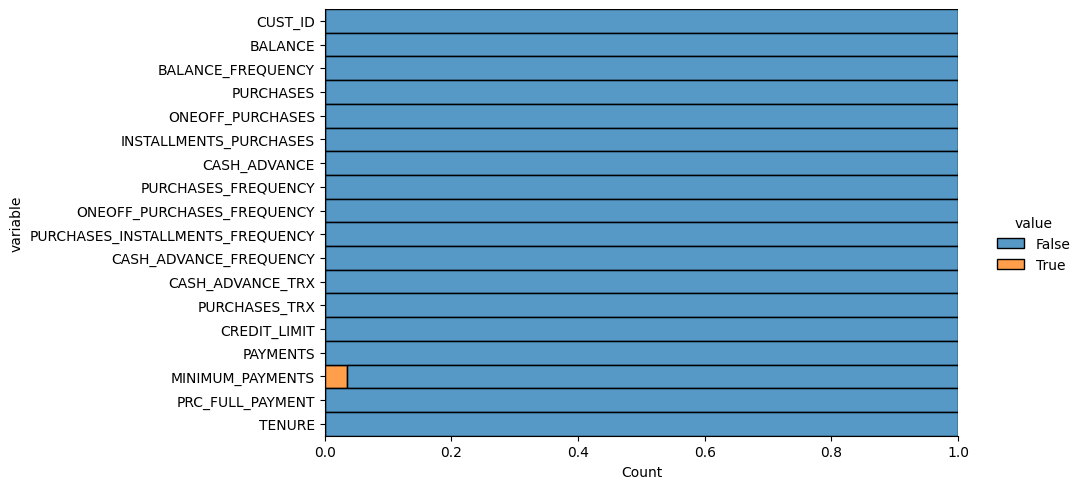

In [8]:
#Visualizacion de la proporcion de los datos nulos
data.isnull().melt().pipe(lambda df: sns.displot(data = df, y = 'variable', hue = 'value',
                                                 multiple = 'fill', aspect = 2))
plt.show()

## Completar los datos faltantes con la media

In [9]:
#Completar los datos nulos con la media de la variable Minimun payments
minimun_payment_average = data['MINIMUM_PAYMENTS'].mean()
data_mod = data.copy()
data_mod['MINIMUM_PAYMENTS'].fillna(minimun_payment_average, inplace = True)

#Completar los datos nulos con la media de la variable Credit limit
credit_limit_average = data['CREDIT_LIMIT'].mean()
data_mod['CREDIT_LIMIT'].fillna(credit_limit_average, inplace = True)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Borrar columna CUST_ID

In [10]:
data_mod.drop('CUST_ID', axis = 1, inplace = True)
data_mod.drop('PURCHASES', axis = 1,inplace = True)
data_mod.drop('PURCHASES_FREQUENCY', axis = 1,inplace = True)
data_mod.drop('CASH_ADVANCE_TRX', axis = 1,inplace = True)
data_mod.drop('BALANCE_FREQUENCY', axis = 1,inplace = True)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   CASH_ADVANCE                      8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   PURCHASES_TRX                     8950 non-null   int64  
 8   CREDIT_LIMIT                      8950 non-null   float64
 9   PAYMENTS                          8950 non-null   float64
 10  MINIMUM_PAYMENTS                  8950 non-null   float64
 11  PRC_FULL_PAYMENT                  8950 non-null   float64
 12  TENURE

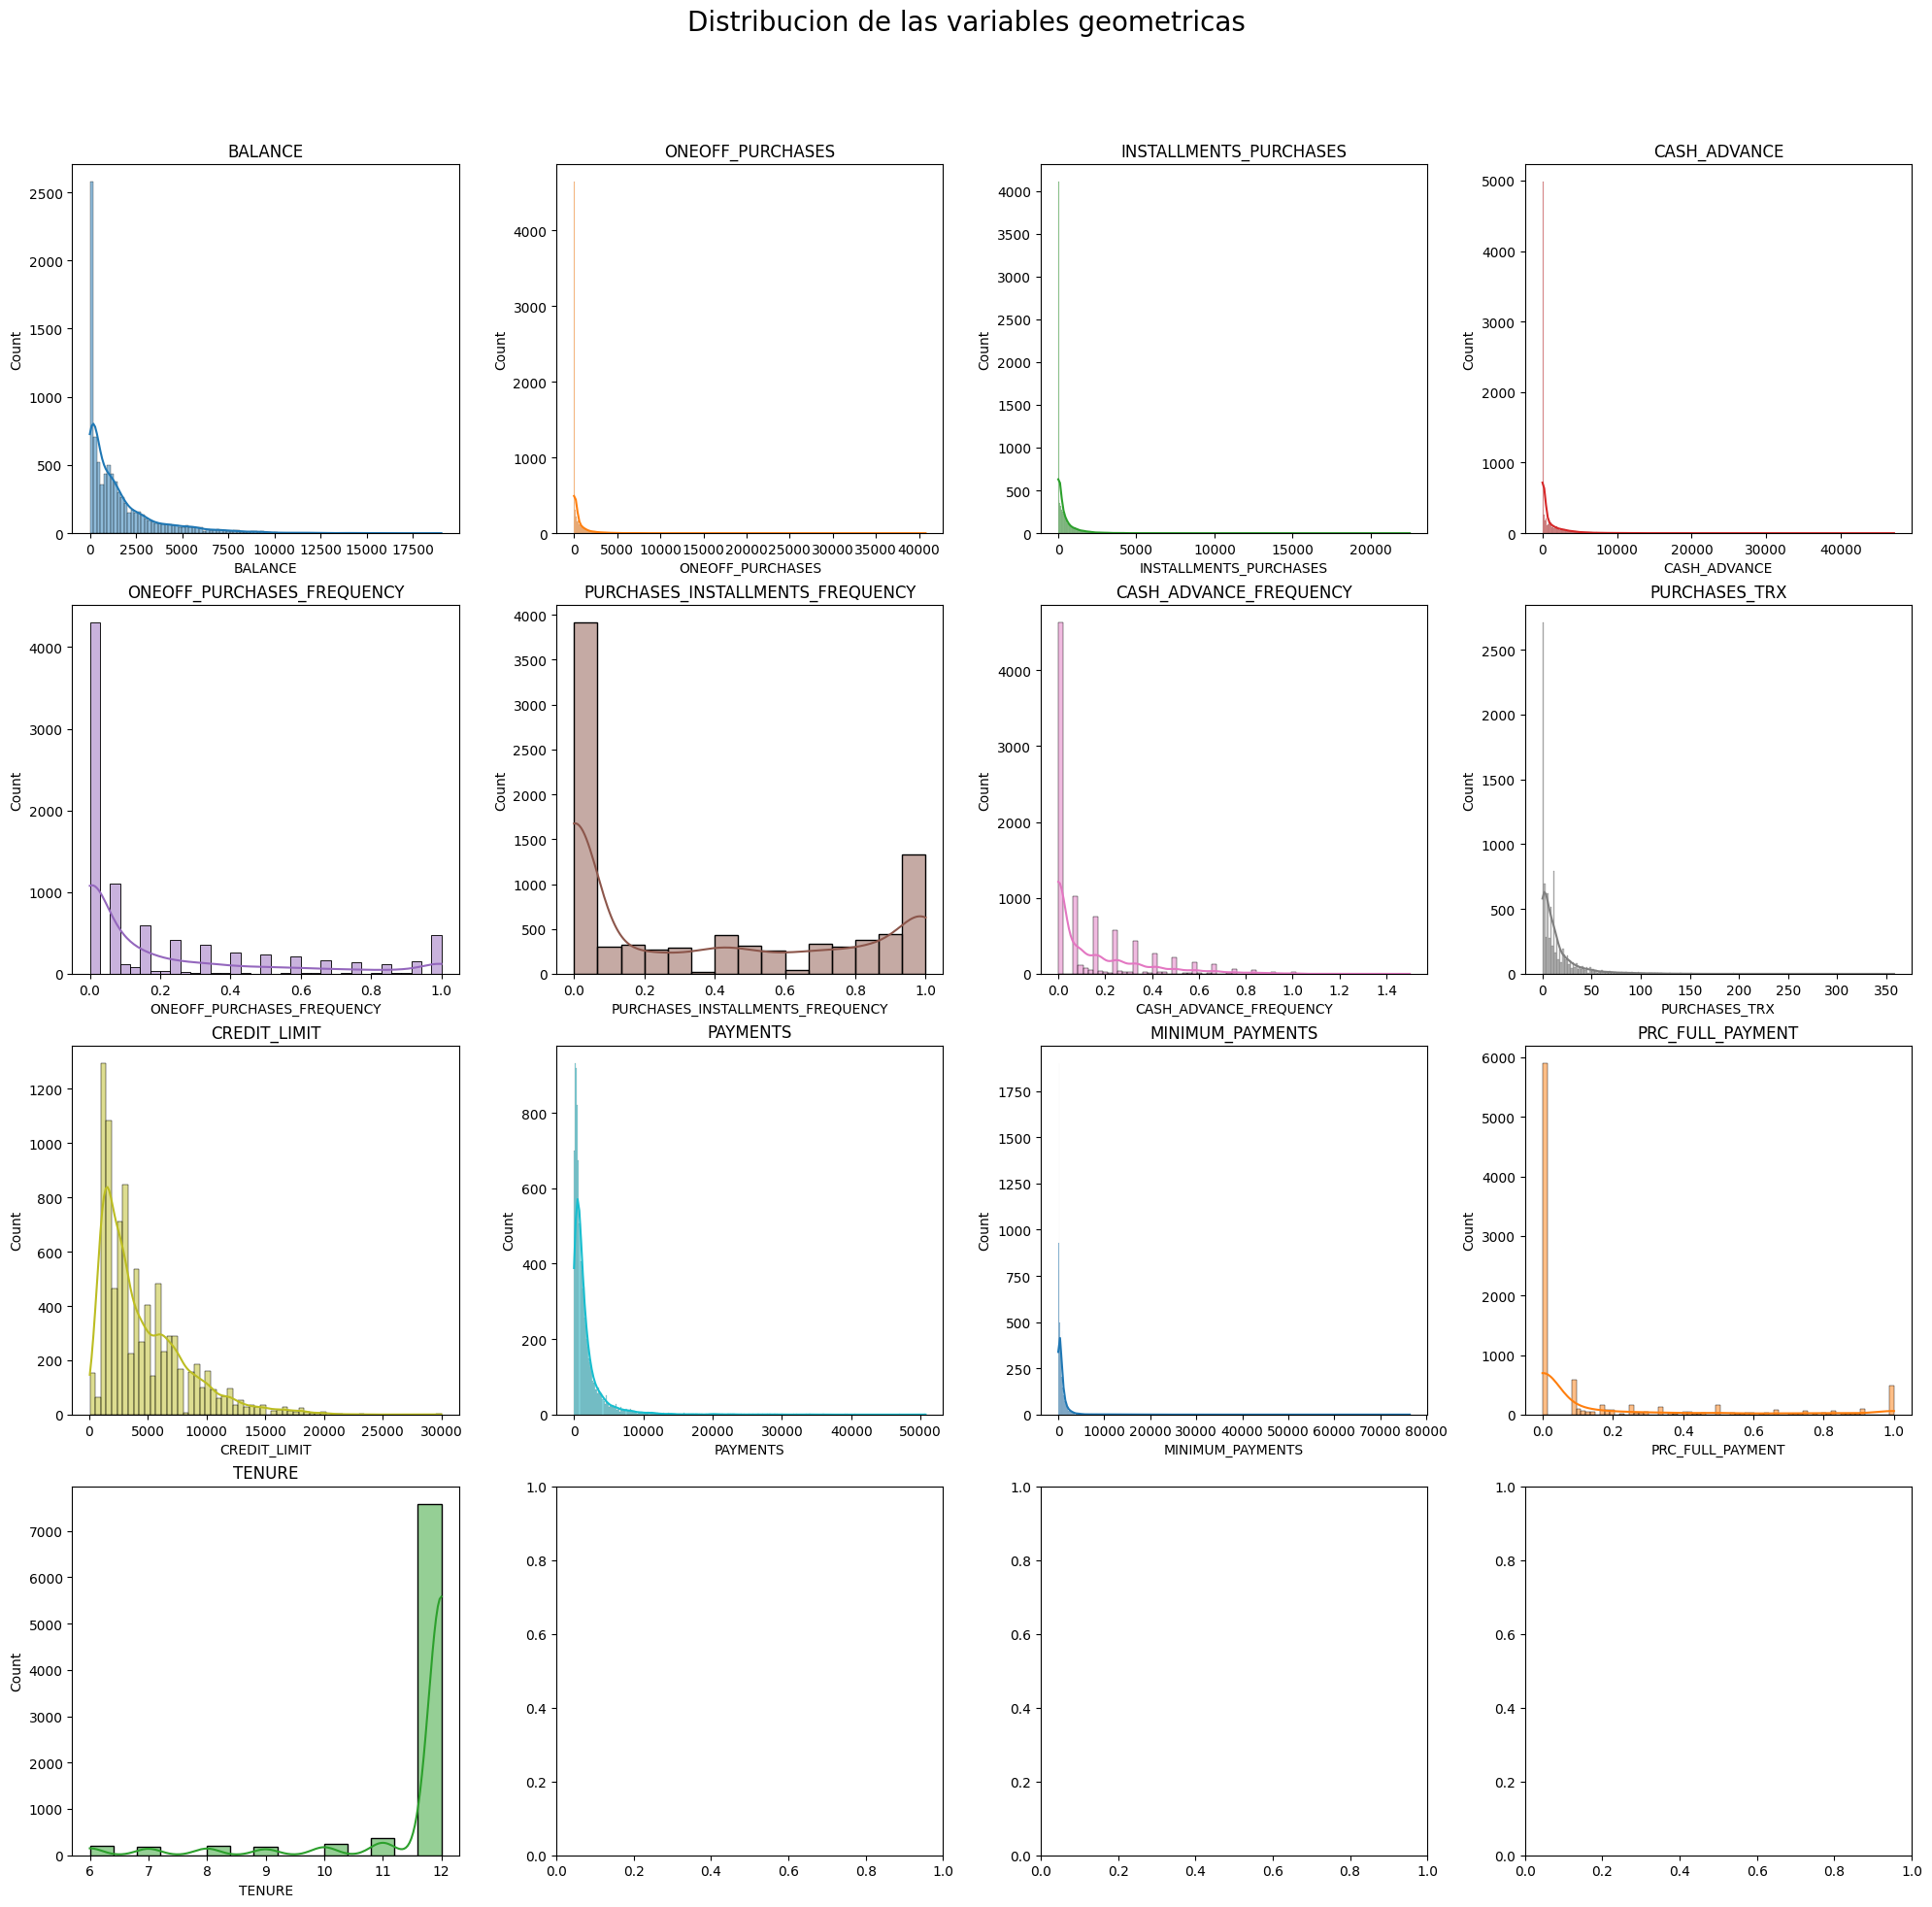

In [11]:
# Histogramas de frecuencias
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flat

num_col = data_mod.select_dtypes(include=['Float64', 'Int64']).columns

for i, col in enumerate(num_col):
    sns.histplot(data=data_mod, x=col, kde=True, color=(list(plt.rcParams['axes.prop_cycle'] * 4)[i]['color']), ax=ax[i])
    ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Distribucion de las variables geometricas', fontsize=20)
plt.show()

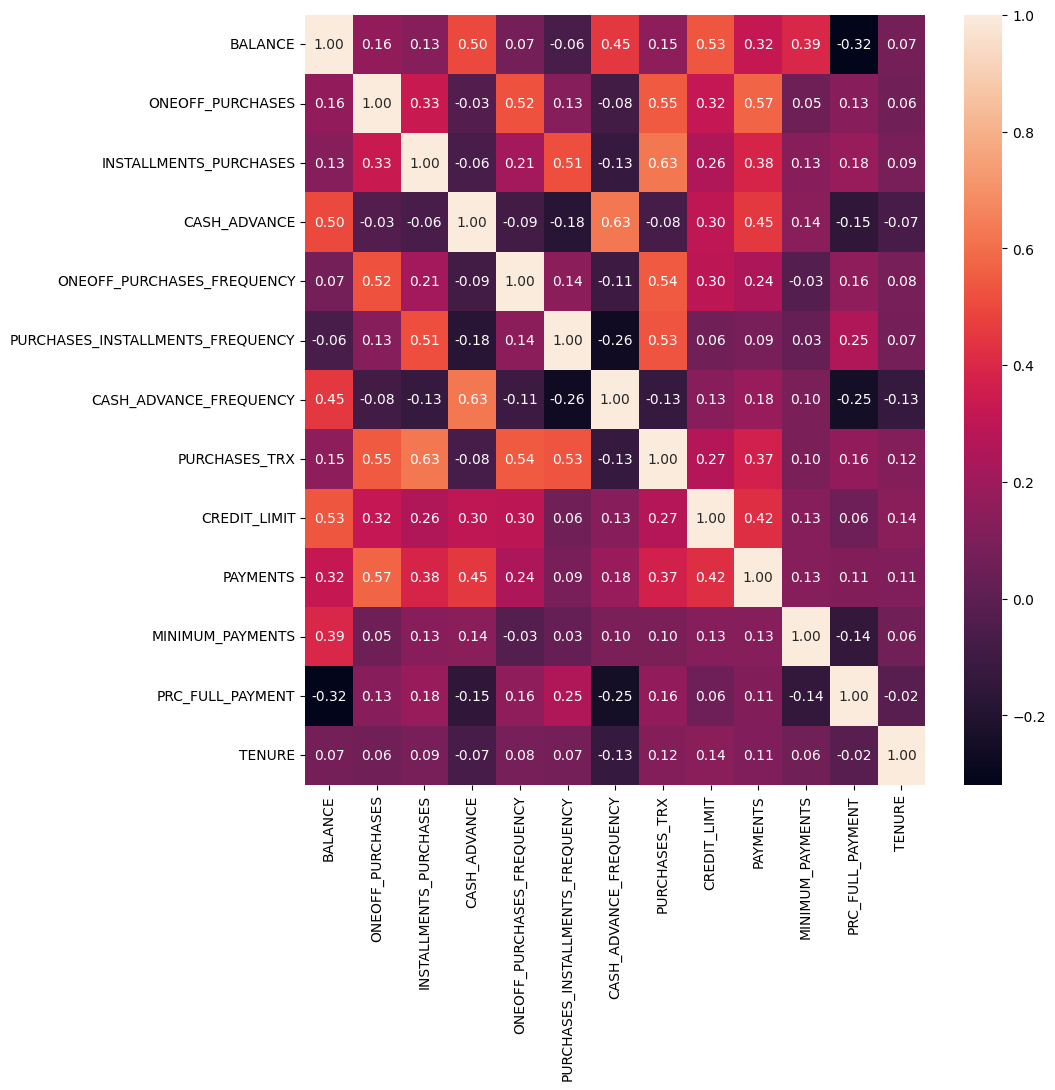

In [12]:
#Grafico de correlacion de pearson
plt.figure(figsize = (10, 10))
sns.heatmap(data_mod.corr(numeric_only = True), annot = True, fmt = '.2f')
plt.show()

In [13]:
#Librerias para preparacion de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

#identificacion de la variables por tipo de dato
num_col = data_mod.select_dtypes(include=['float64','int64']).columns.to_list()


#Definir los transformadores por tipo de dato
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

#sieñar el transformador de columnas
preperocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col)
    ],
    remainder='passthrough'
)
preperocessor



ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['BALANCE', 'ONEOFF_PURCHASES',
                                  'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                                  'ONEOFF_PURCHASES_FREQUENCY',
                                  'PURCHASES_INSTALLMENTS_FREQUENCY',
                                  'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX',
                                  'CREDIT_LIMIT', 'PAYMENTS',
                                  'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
                                  'TENURE'])])

In [14]:
data_prep = preperocessor.fit_transform(data_mod)
labels = np.concatenate([num_col])
data_pro = pd.DataFrame(data_prep, columns=labels)
data_pro

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.000000,0.004240,0.000000,0.000000,0.083333,0.000000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.000000,0.000000,0.136685,0.000000,0.000000,0.166667,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,0.018968,0.000000,0.000000,1.000000,0.000000,0.000000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.036775,0.000000,0.004366,0.083333,0.000000,0.055555,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,0.000393,0.000000,0.000000,0.083333,0.000000,0.000000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,0.000000,0.012939,0.000000,0.000000,0.833333,0.000000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,0.000000,0.013333,0.000000,0.000000,0.833333,0.000000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
8947,0.001229,0.000000,0.006418,0.000000,0.000000,0.666667,0.000000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.000000,0.000000,0.000776,0.000000,0.000000,0.111111,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


# Modelado

## Kmeans

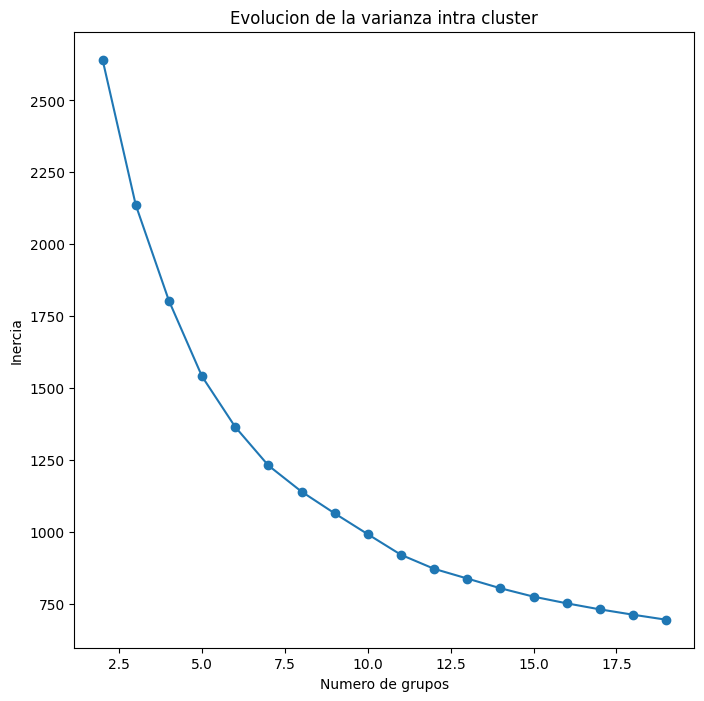

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 20)
inertias = []

for n_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=25, n_init=20)
    kmeans_model.fit(data_pro)
    inertias.append(kmeans_model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Evolucion de la varianza intra cluster')
plt.xlabel('Numero de grupos')
plt.ylabel('Inercia')
plt.show()

In [16]:
range_n_clusters = range(6,13)
sil_score=[]


for n_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=25, n_init=20)
    kmeans_model.fit(data_pro)
    cluster_label=kmeans_model.fit_predict(data_pro)
    sil_avg = silhouette_score(data_pro, cluster_label)
    sil_score.append(sil_avg)




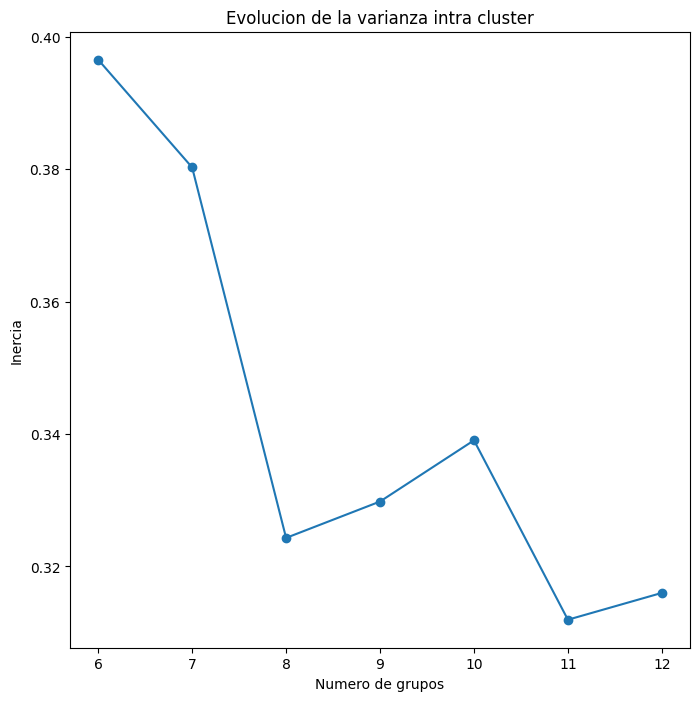

In [17]:
plt.figure(figsize=(8,8))
plt.plot(range_n_clusters, sil_score, marker='o')
plt.title('Evolucion de la varianza intra cluster')
plt.xlabel('Numero de grupos')
plt.ylabel('Inercia')
plt.show()

## jerarquico


In [18]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

#Funcion oara dibujar dendrograma
def dibujar_dendrograma(model, **kwargs):
    counts  = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [19]:
kmeans_model = KMeans(n_clusters=6, random_state=25, n_init=20)
kmeans_model.fit(data_pro)

KMeans(n_clusters=6, n_init=20, random_state=25)

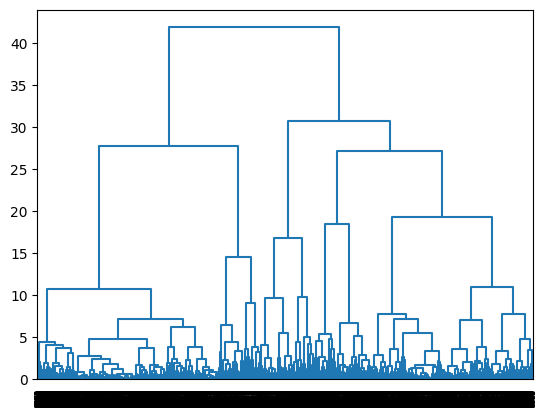

In [20]:
hclust = AgglomerativeClustering(metric='euclidean',
                                   linkage='ward',
                                   distance_threshold=0,
                                   n_clusters=None)
hclust.fit(data_pro)
dibujar_dendrograma(hclust, color_threshold=0)

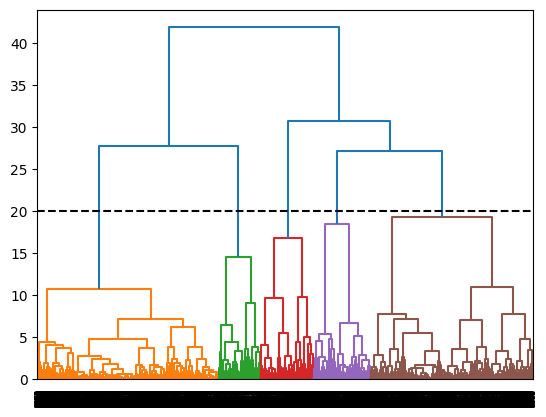

In [21]:
dendrogram_prun=20
dibujar_dendrograma(hclust,color_threshold=dendrogram_prun)
plt.axhline(y=dendrogram_prun, c='black', linestyle='--')
plt.show()

In [22]:
hclust= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hclust.fit(data_pro)    

AgglomerativeClustering(n_clusters=5)

# DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product
from sklearn.metrics import silhouette_score  

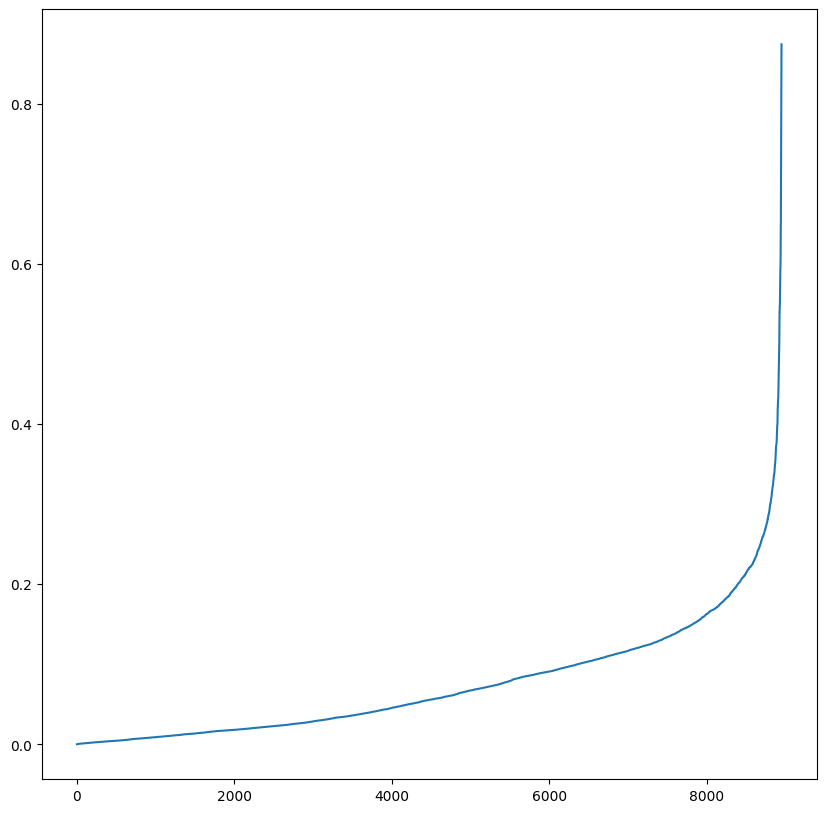

In [24]:
# Identificar el rango de existencia de epsilon
neighbors= NearestNeighbors(n_neighbors=2)
neighbors_fit= neighbors.fit(data_pro)
distance,index= neighbors_fit.kneighbors(data_pro)
distance= np.sort(distance, axis=0)
distance= distance[:,1]
plt.figure(figsize=(10,10))
plt.plot(distance)
plt.show()

In [25]:
eps_value=np.arange(0.2,0.9,0.1)
min_samples=np.arange(2,10)
dbscan_params= list(product(eps_value, min_samples))
sil_score=[]
for p in dbscan_params:
    label=DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(data_pro)
    sil_score.append(silhouette_score(data_pro, label))


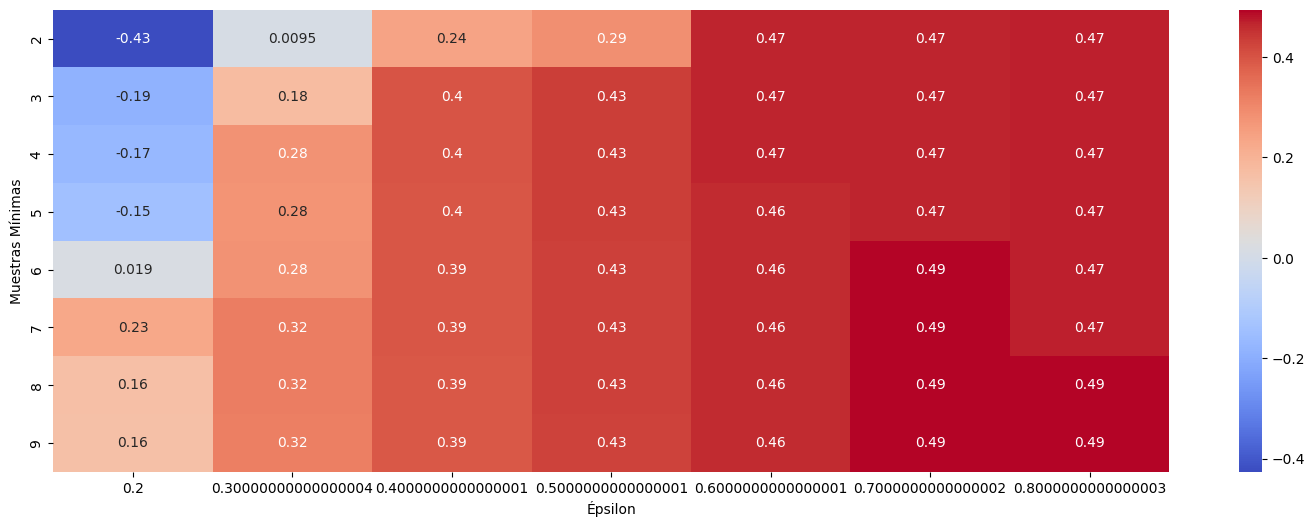

In [26]:
# Heat map
dbscan_params_adj=pd.DataFrame.from_records(dbscan_params, columns=['Épsilon','Muestras Mínimas'])
dbscan_params_adj['Score']=sil_score
pivot_data=pd.pivot_table(dbscan_params_adj, values='Score', index='Muestras Mínimas', columns='Épsilon')
plt.figure(figsize=(18,6))
sns.heatmap(pivot_data, annot=True, fmt='.2g',cmap='coolwarm')
plt.show()

In [27]:
dbscan_model= DBSCAN(eps=0.7, min_samples=6)

## Evaluaciones de modelo

In [28]:
label_kmeans= kmeans_model.fit_predict(data_pro)
label_hclust= hclust.fit_predict(data_pro)
label_dbscan= dbscan_model.fit_predict(data_pro)

In [29]:
sil_kmeans=silhouette_score(data_pro, label_kmeans)
sil_agg=silhouette_score(data_pro, label_hclust)
sil_dbscan=silhouette_score(data_pro, label_dbscan)

print('Silhouette Kmeans: ', sil_kmeans)
print('Silhouette Agglomerative: ', sil_agg)
print('Silhouette DBSCAN: ', sil_dbscan)

Silhouette Kmeans:  0.39655574293641405
Silhouette Agglomerative:  0.29746284655867367
Silhouette DBSCAN:  0.4941296681853


In [30]:
np.unique(label_dbscan)

array([-1,  0])

In [31]:
data_grupos=data_pro.copy()
data_grupos['Kmeans']=label_kmeans
data_grupos['Agglomerative']=label_hclust
data_grupos['DBSCAN']=label_dbscan


In [32]:
data_grupos.Kmeans.value_counts()

Kmeans
0    4082
1    1898
5     867
3     783
4     708
2     612
Name: count, dtype: int64

In [33]:
data_grupos.Agglomerative.value_counts()

Agglomerative
3    3279
0    2938
1    1019
2     966
4     748
Name: count, dtype: int64

In [34]:
data_grupos.DBSCAN.value_counts()

DBSCAN
 0    8942
-1       8
Name: count, dtype: int64

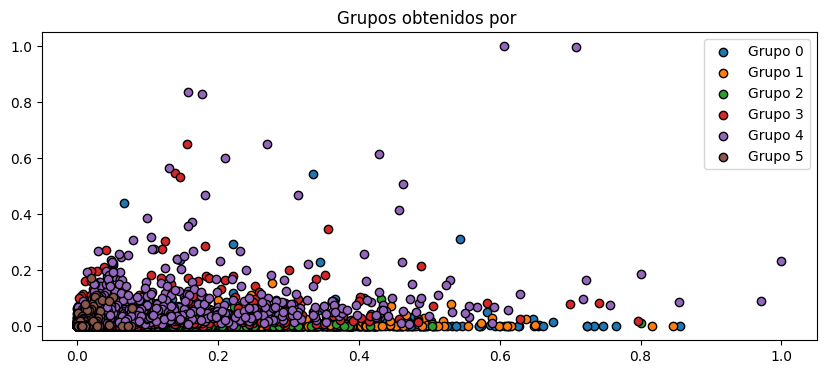

In [35]:
label=label_kmeans
X=data_pro.values

fig, ax= plt.subplots(1,1,figsize=(10,4))
for i in np.unique(label):
    ax.scatter(
        X[label==i,0],
        X[label==i,1],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f'Grupo {i}')  
ax.set_title('Grupos obtenidos por ')
ax.legend()
plt.show()

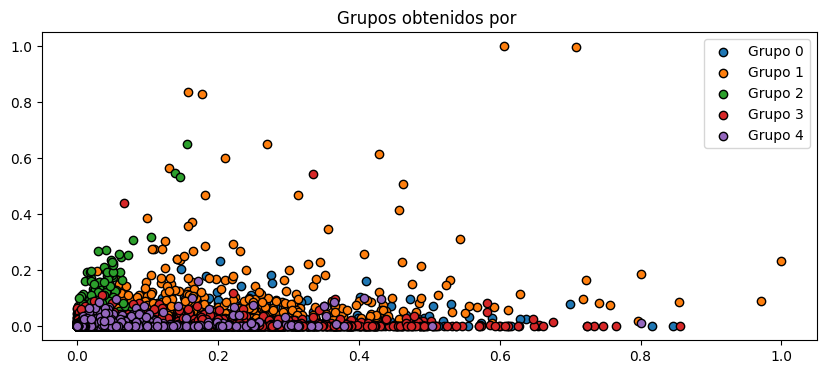

In [36]:
label=label_hclust
X=data_pro.values

fig, ax= plt.subplots(1,1,figsize=(10,4))
for i in np.unique(label):
    ax.scatter(
        X[label==i,0],
        X[label==i,1],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f'Grupo {i}')  
ax.set_title('Grupos obtenidos por ')
ax.legend()
plt.show()

In [37]:
import plotly.graph_objects as go

# Seleccionar las 3 variables más relevantes (por ejemplo, "income", "age", "credit_score")
X_3D = data_pro[['PAYMENTS', 'CREDIT_LIMIT', 'PURCHASES_TRX','CASH_ADVANCE']].values

fig = go.Figure()

for i in np.unique(label_kmeans):
    fig.add_trace(
        go.Scatter3d(
            x=X_3D[label_kmeans==i, 0], 
            y=X_3D[label_kmeans==i, 1],
            z=X_3D[label_kmeans==i, 2],
            mode='markers',
            marker=dict(
                size=5,
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
                opacity=0.8
            ),
            name=f'Grupo {i}'
        )
    )

fig.update_layout(
    scene=dict(
        xaxis_title='PAYMENTS',
        yaxis_title='CREDIT_LIMIT',
        zaxis_title='PURCHASES_TRX',
        xaxis=dict(range=[min(X_3D[:, 0]), max(X_3D[:, 0])]),
        yaxis=dict(range=[min(X_3D[:, 1]), max(X_3D[:, 1])]),
        zaxis=dict(range=[min(X_3D[:, 2]), max(X_3D[:, 2])]),
    ),
    title="Grupos K-means en 3D",
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=['scene.camera.eye', [1.25, 1.25, 1.25]],
                    label='Vista Frontal',
                    method='update'
                ),
                dict(
                    args=['scene.camera.eye', [1.25, 1.25, -1.25]],
                    label='Vista Trasera',
                    method='update'
                ),
                dict(
                    args=['scene.camera.eye', [-1.25, 1.25, 1.25]],
                    label='Vista Lateral',
                    method='update'
                ),
                dict(
                    args=['scene.camera.eye', [1.25, -1.25, 1.25]],
                    label='Vista Lateral',
                    method='update'
                ),
            ]),
            direction='down',
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.1,
            yanchor='top'
        ),
    ]
)

fig.show()

In [38]:
centros = pd.DataFrame(kmeans_model.cluster_centers_)
centros.columns = np.concatenate([num_col])
centros

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.095162,0.005388,0.003185,0.028622,0.074172,0.066656,0.121952,0.007521,0.140018,0.030180,0.011987,0.035007,0.979335
1,0.077785,0.006900,0.034401,0.013550,0.101569,0.834897,0.058586,0.060691,0.130887,0.029071,0.016152,0.058628,0.974649
2,0.066241,0.006586,0.004885,0.035303,0.121384,0.191870,0.169424,0.012027,0.098897,0.016125,0.006641,0.062971,0.220861
3,0.080520,0.043325,0.006584,0.012665,0.759495,0.123071,0.056876,0.062026,0.191622,0.043254,0.008820,0.242877,0.976616
4,0.128442,0.073477,0.069615,0.014633,0.812119,0.868513,0.061927,0.182023,0.257131,0.087149,0.012186,0.261100,0.985856
5,0.005379,0.005818,0.032084,0.001648,0.083626,0.664476,0.006122,0.042796,0.133365,0.025435,0.002338,0.817483,0.904927


In [40]:
numInverseTransformer = preperocessor.named_transformers_['num']['scaler']
centNumInvTrans = numInverseTransformer.inverse_transform(centros[['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE' ]])


In [41]:
centros_transformados = pd.DataFrame(np.concatenate([centNumInvTrans], axis = 1), columns = np.concatenate([num_col]))
centros_transformados

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1812.177018,219.622882,71.657535,1349.180534,0.074172,0.066656,0.182928,2.692477,4243.536195,1530.751707,915.912859,0.035007,11.876011
1,1481.278580,281.234421,774.020258,638.694340,0.101569,0.834897,0.087879,21.727368,3970.063530,1474.545203,1234.158221,0.058628,11.847895
2,1261.432634,268.456356,109.923611,1664.062558,0.121384,0.191870,0.254136,4.305556,3011.973501,817.890383,507.405472,0.062971,7.325163
3,1533.345571,1766.001416,148.149694,596.988660,0.759495,0.123071,0.085314,22.205357,5789.090909,2193.908501,673.925300,0.242877,11.859694
4,2445.940804,2995.034738,1566.341513,689.743148,0.812119,0.868513,0.092890,65.164074,7751.060820,4420.346789,931.114839,0.261100,11.915134
5,102.432040,237.134099,721.889688,77.687818,0.083626,0.664476,0.009182,15.321016,4044.290538,1290.121841,178.660257,0.817483,11.429561


In [45]:
labels = np.concatenate([num_col])
data_inv = pd.DataFrame(centros_transformados, columns=labels)
data_inv

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1812.177018,219.622882,71.657535,1349.180534,0.074172,0.066656,0.182928,2.692477,4243.536195,1530.751707,915.912859,0.035007,11.876011
1,1481.278580,281.234421,774.020258,638.694340,0.101569,0.834897,0.087879,21.727368,3970.063530,1474.545203,1234.158221,0.058628,11.847895
2,1261.432634,268.456356,109.923611,1664.062558,0.121384,0.191870,0.254136,4.305556,3011.973501,817.890383,507.405472,0.062971,7.325163
3,1533.345571,1766.001416,148.149694,596.988660,0.759495,0.123071,0.085314,22.205357,5789.090909,2193.908501,673.925300,0.242877,11.859694
4,2445.940804,2995.034738,1566.341513,689.743148,0.812119,0.868513,0.092890,65.164074,7751.060820,4420.346789,931.114839,0.261100,11.915134
5,102.432040,237.134099,721.889688,77.687818,0.083626,0.664476,0.009182,15.321016,4044.290538,1290.121841,178.660257,0.817483,11.429561


In [55]:
fig = px.scatter_3d(data_frame = data_pro, x = 'BALANCE', y = 'PAYMENTS', z = 'MINIMUM_PAYMENTS', color = 'BALANCE')
fig.show()